# **Prerequisites**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('Phishing Data.csv')

# **Exploring the Dataset:**

In [4]:
# Display the first few rows
print(data.head())

   having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0                  1           1                   0                 0   
1                  0           1                   0                 0   
2                  0           0                   0                 0   
3                  0           0                   0                 0   
4                  0           0                   1                 0   

   double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  SSLfinal_State  \
0                         1             -1                 -1              -1   
1                         0             -1                  0               1   
2                         0             -1                 -1              -1   
3                         0             -1                 -1              -1   
4                         0             -1                  1               1   

   Domain_registeration_length  Favicon  ...  popUpWidnow  Iframe  \

In [5]:
# Get dataset information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

*The data seems cleaned already, no null values and no data imputations required.

In [6]:
# Get basic statistics
print(data.describe())

       having_IP_Address   URL_Length  Shortining_Service  having_At_Symbol  \
count        2456.000000  2456.000000         2456.000000       2456.000000   
mean            0.113192    -0.649837            0.122964          0.054560   
std             0.316892     0.752690            0.328463          0.227166   
min             0.000000    -1.000000            0.000000          0.000000   
25%             0.000000    -1.000000            0.000000          0.000000   
50%             0.000000    -1.000000            0.000000          0.000000   
75%             0.000000    -1.000000            0.000000          0.000000   
max             1.000000     1.000000            1.000000          1.000000   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
count               2456.000000    2456.000000        2456.000000   
mean                   0.125407      -0.254886          -0.185668   
std                    0.331247       0.676170           0.802068   
min         

# Defining **Feature Selection** and **Target Variable**:

In [8]:
X = data.drop('Result', axis=1)  # Features
y = data['Result']  # Target

# Splitting the Data into **Training** and **Testing Sets**:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Feature Scaling:
Since the data seems to be predefined in categorical format i.e., {-1, 0, 1}, I'm proceeding without scaling the data further, using RandomForest in accordance with the data selection.

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# **Model Prediction:**

In [11]:
y_pred = model.predict(X_test)

# **Model Evaluation:**

In [12]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[409   5]
 [  7 316]]


In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9837177747625508


In [14]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       414
           1       0.98      0.98      0.98       323

    accuracy                           0.98       737
   macro avg       0.98      0.98      0.98       737
weighted avg       0.98      0.98      0.98       737



# Visualizing the Results:

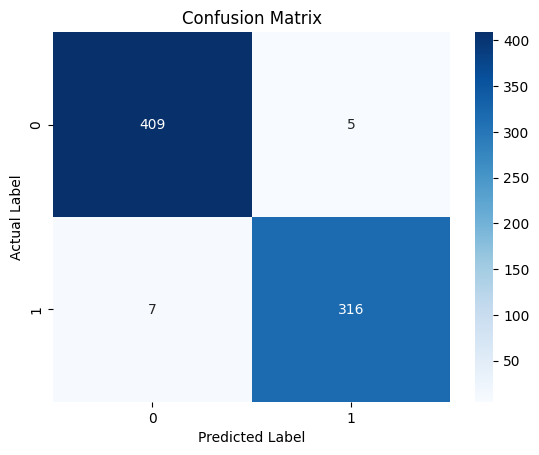

In [15]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# **Feature Importance:**

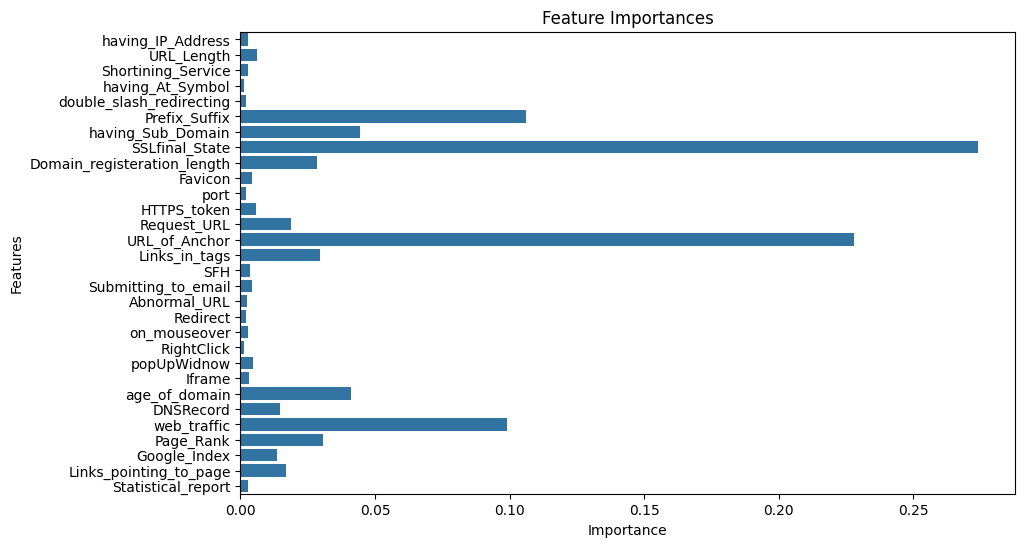

In [16]:
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

# **Saving the model** (for further API Integrations with the website trackers and browsers):

In [ ]:
import joblib
joblib.dump(model, 'phishing_model.pkl')